In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Custom modules
import sys 
sys.path.append('../environments/')
import gridworlds
from dp import policy_evaluation


# Dynamic Programming

In [2]:
def plot_value_functions(V, env):
    plt.figure(figsize=(9, 7))
    plt.imshow(np.reshape(V[0], env.size), cmap='RdYlGn')
    plt.title('Value-functions after {} interations'.format(V[1]))
    plt.axis('off')
    plt.colorbar()
    plt.show()   

## Policy evaluation

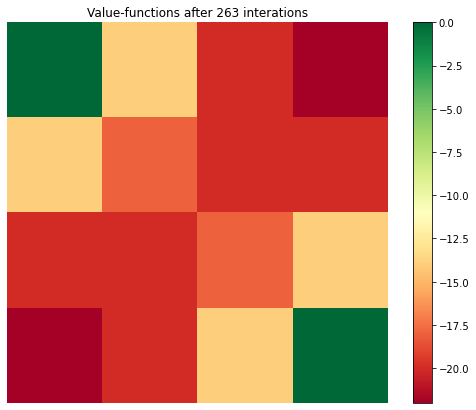

In [3]:
# 4x4 Grid (Sutton & Barto, 2018, page 76) with equiprobable random policy
env = gridworlds.Grid_4x4()
pi = np.ones([len(env.state_space()), len(env.action_space())]) / len(env.action_space())
V = policy_evaluation(pi, env, gamma=1)
plot_value_functions(V, env)


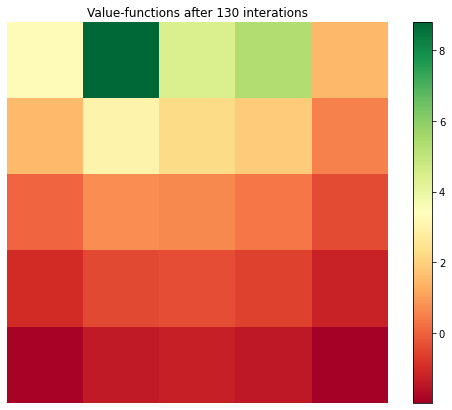

In [4]:
# 5x5 Grid (Sutton & Barto, 2018, page 60) with equiprobable random policy
env = gridworlds.Grid_5x5_Sutton()
pi = np.ones([len(env.state_space()), len(env.action_space())]) / len(env.action_space())
V = policy_evaluation(pi, env, gamma=0.9)
plot_value_functions(V, env)